In [1]:
from masskit.utils.tablemap import ArrowLibraryMap
import pyarrow.parquet as pq
from masskit.data_specs.spectral_library import LibraryAccessor
from masskit.test_fixtures.demo_fixtures import cho_uniq_short_parquet

# Tables of spectra
A spectral library is a table of spectrum objects and associated data (nce, precursor charge, etc.), arranged so that there is one spectrum per row and one column per piece of associated data.  In Masskit, spectral libraries are kept in pandas dataframes and arrow tables stored in the parquet format. The arrow tables are wrapped in objects of class ArrowLibraryMap.


## Pandas dataframes
### Load a pandas dataframe from the sql version of a spectral library
Limit to precursor charge 2+ and a set of columns.  Specifying the columns is not necessary.  Functions to operate on the pandas dataframe are accessed via importing LibraryAccessor.  LibraryAccessor creates a namespace called "lib" as a member of each dataframe that includes a series of functions that operate on a dataframe. For example, if your dataframe is called df, then df.lib.to_msp('my_file.msp') will dump df to an msp file.

In [2]:
table = ArrowLibraryMap.from_parquet(cho_uniq_short_parquet())
df = table.table.to_pandas(self_destruct=True)[['id', 'name', 'peptide', 'nce', 'spectrum']].head(10)

INFO:root:created chunk 1 with 100 records
INFO:root:processing batch 0 with size 100
INFO:root:created chunk 1 with 0 records


### Take the top 10 lines of the dataframe and display in html

id,name,peptide,nce,spectrum
0,"AAAACALTPGPLADLAAR/2_1(4,C,CAM)",AAAACALTPGPLADLAAR,35.00,
1,"AAAACALTPGPLADLAAR/2_1(4,C,CAM)",AAAACALTPGPLADLAAR,35.00,
2,AAAAGQTGTVPPGAPGALPLPGMAIVK/2,AAAAGQTGTVPPGAPGALPLPGMAIVK,35.00,
3,AAAAGSTSVKPIFSR/2,AAAAGSTSVKPIFSR,34.00,
4,AAAAGSTSVKPIFSR/3,AAAAGSTSVKPIFSR,34.00,
5,"AAAALGSHGSCSSEVEK/2_1(10,C,CAM)",AAAALGSHGSCSSEVEK,34.00,
6,"AAAALGSHGSCSSEVEK/2_1(10,C,CAM)",AAAALGSHGSCSSEVEK,35.00,
7,"AAAALGSHGSCSSEVEK/3_1(10,C,CAM)",AAAALGSHGSCSSEVEK,35.00,
8,"AAAALGSHGSCSSEVEKETQEK/3_1(10,C,CAM)",AAAALGSHGSCSSEVEKETQEK,35.00,
9,"AAAALGSHGSCSSEVEKETQEK/3_1(10,C,CAM)",AAAALGSHGSCSSEVEKETQEK,34.00,

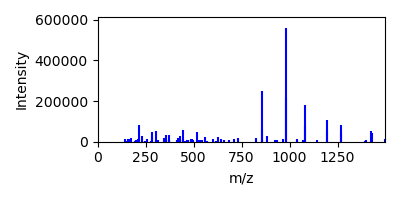
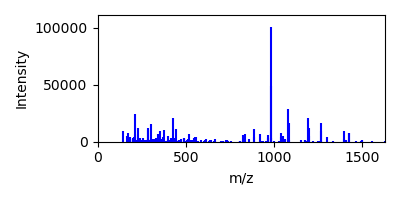
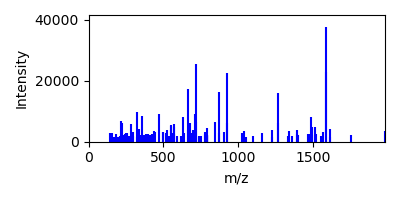
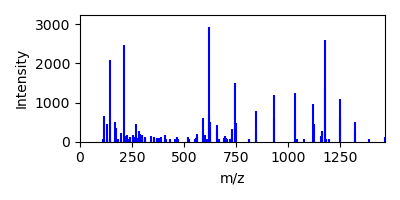
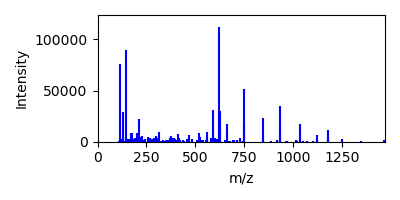
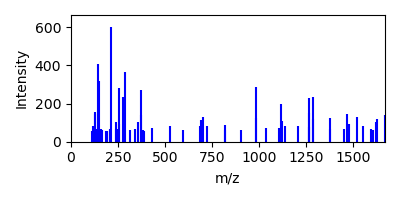
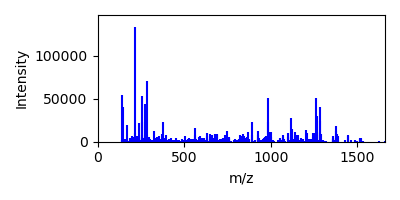
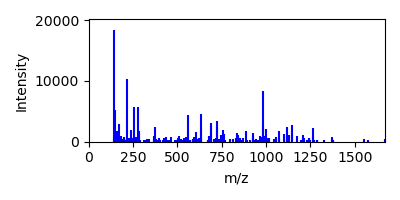
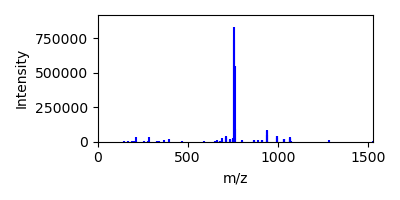
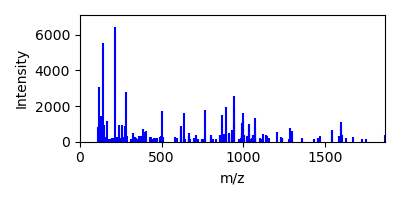

In [3]:
df.lib.display()

### List columns

In [4]:
df.columns

Index(['id', 'name', 'peptide', 'nce', 'spectrum'], dtype='object')

### Iterating through a dataframe

In [5]:
for row in df.head(10).itertuples():
    print (row.peptide, row.nce)

AAAACALTPGPLADLAAR 35.0
AAAACALTPGPLADLAAR 35.0
AAAAGQTGTVPPGAPGALPLPGMAIVK 35.0
AAAAGSTSVKPIFSR 34.0
AAAAGSTSVKPIFSR 34.0
AAAALGSHGSCSSEVEK 34.0
AAAALGSHGSCSSEVEK 35.0
AAAALGSHGSCSSEVEK 35.0
AAAALGSHGSCSSEVEKETQEK 35.0
AAAALGSHGSCSSEVEKETQEK 34.0


### Query on the dataframe to return a dataframe containing rows that match the query, then display the new dataframe

id,name,peptide,nce,spectrum
5,"AAAALGSHGSCSSEVEK/2_1(10,C,CAM)",AAAALGSHGSCSSEVEK,34.00,
6,"AAAALGSHGSCSSEVEK/2_1(10,C,CAM)",AAAALGSHGSCSSEVEK,35.00,
7,"AAAALGSHGSCSSEVEK/3_1(10,C,CAM)",AAAALGSHGSCSSEVEK,35.00,

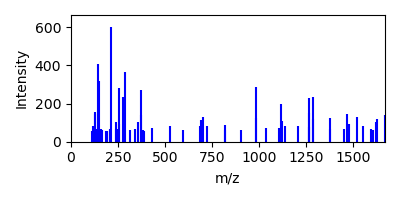
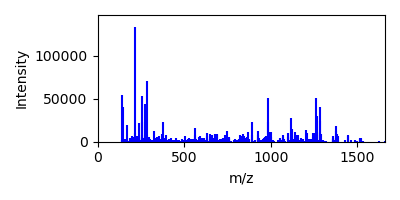
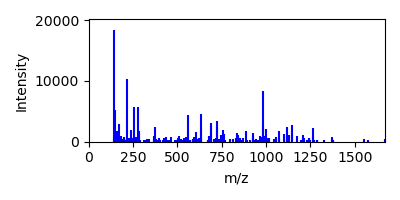

In [6]:
df_single_peptide = df.query('peptide == "AAAALGSHGSCSSEVEK"')
df_single_peptide.lib.display()

## Select one spectrum from the new dataframe, filter out low m/z peaks, normalize the base intensity to 1.0

In [7]:
type(df_single_peptide.iloc[0]['spectrum'])

masskit.spectrum.spectrum.Spectrum

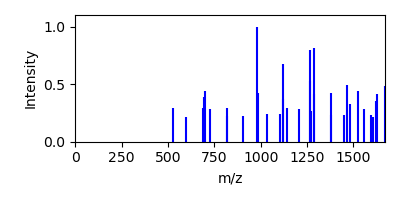

In [8]:
new_spectrum = df_single_peptide.iloc[0]['spectrum']
new_spectrum = new_spectrum.filter(min_mz=500).norm(1.0)
new_spectrum

### Input/output
The spectral library in the form of a dataframe has the ability to read and write a variety of formats.

#### MSP

In [9]:
# write out msp file with peptide annotations
df_single_peptide['spectrum'].array.to_msp("peptides.msp", annotate_peptide=True)

##### save a single spectrum at row 0 as an msp file

In [10]:
df_single_peptide.iloc[[0]]['spectrum'].array.to_msp("single_spectrum.msp")

#### MGF

In [11]:
df_single_peptide['spectrum'].array.to_mgf("peptides.msp")

#### PKL (python pickle)

In [12]:
df_single_peptide.to_pickle('single_peptide.pkl')

#### CSV

In [13]:
df_single_peptide.to_csv('single_peptide.csv')